In [1]:
import xarray as xr # top library for manipulating netcdf files
import netCDF4 # more basic library for manipulating netcdf files, used for exploring
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean
import cmocean.cm as cmo

ds = xr.open_dataset("C:/Users/sripr/Downloads/1GOM21SU_MODIS_L2_aCDOM (1).nc")
ds

<xarray.Dataset>
Dimensions:   (y: 380, x: 542, time: 21)
Coordinates:
  * y         (y) float64 2.816e+05 2.806e+05 ... -9.623e+04 -9.723e+04
  * x         (x) float64 -2.36e+05 -2.35e+05 -2.34e+05 ... 3.035e+05 3.045e+05
    lon       (y, x) float64 ...
    lat       (y, x) float64 ...
  * time      (time) datetime64[ns] 2021-07-15T19:20:00.512000 ... 2021-07-27...
Data variables: (12/14)
    Rrs_412   (time, y, x) float32 ...
    Rrs_443   (time, y, x) float32 ...
    Rrs_469   (time, y, x) float32 ...
    Rrs_488   (time, y, x) float32 ...
    Rrs_531   (time, y, x) float32 ...
    Rrs_547   (time, y, x) float32 ...
    ...        ...
    Rrs_667   (time, y, x) float32 ...
    Rrs_678   (time, y, x) float32 ...
    aCDOM300  (time, y, x) float32 ...
    aCDOM355  (time, y, x) float32 ...
    S275_295  (time, y, x) float32 ...
    DOC       (time, y, x) float32 ...
Attributes: (12/48)
    title:                          MODISA Level-2 Data
    product_name:                   AQUA_MODIS.20210715T192000.L2.OC.nc
    processing_version:             R2022.0
    equatorCrossingLongitude:       82.23936
    orbit_number:                   102121
    history:                        l2gen par=/data5/sdpsoper/vdc/vpu4/workbu...
    ...                             ...
    geospatial_lon_max:             -86.333885
    geospatial_lon_min:             -94.58981
    startDirection:                 Ascending
    endDirection:                   Ascending
    day_night_flag:                 Day
    earth_sun_distance_correction:  0.9679204821586609

In [2]:
a = np.nanmin(ds.lon)

In [3]:
b = np.nanmax(ds.lon)

In [4]:
c = np.nanmin(ds.lat)

In [5]:
d = np.nanmax(ds.lat)

Text(0.5, 1.0, '2021-07')

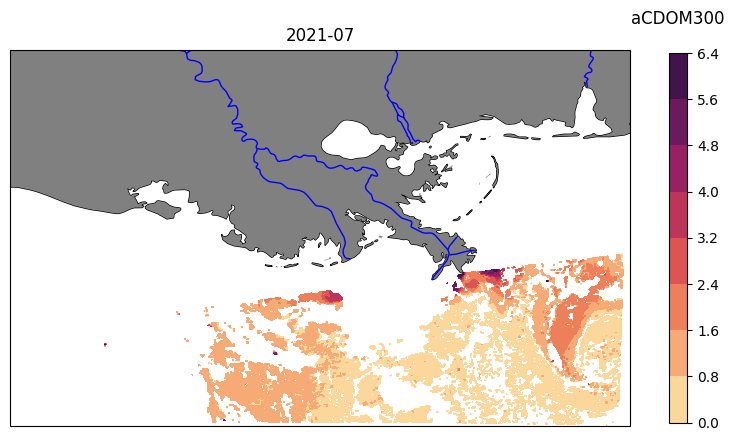

In [12]:
cm = cmocean.cm.matter

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())


ax.set_extent([a,b,c,d], crs=ccrs.PlateCarree())

ax.coastlines()

ax.add_feature(cfeature.LAND, facecolor='lightgray')

ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale='10m')) 
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                                scale='10m'))

map = ax.contourf(ds['lon'], ds['lat'], ds['aCDOM300'][0,:,:], cmap = cm, transform=ccrs.PlateCarree())

cb = plt.colorbar(map, ax=ax, shrink = 0.48, pad = 0.05)
cb.ax.set_title('aCDOM300\n')

ax.set_title('2021-07')